# Color Transfer

In [1]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

In [2]:
def get_channels(image):
    return image[:,:,0], image[:,:,1], image[:,:,2]

In [3]:
def transfer_color(source, transfer):
    final = np.zeros(source.shape)
    source = color.rgb2lab(source).astype(np.float32)
    transfer = color.rgb2lab(transfer).astype(np.float32)
    
    (l_s, a_s, b_s) = get_channels(source)
    (l_t, a_t, b_t) = get_channels(transfer)
    
    l_final = (np.std(l_t) / np.std(l_s))*(l_s - np.mean(l_s)) + np.mean(l_t)
    a_final = (np.std(a_t) / np.std(a_s))*(a_s - np.mean(a_s)) + np.mean(a_t)
    b_final = (np.std(b_t) / np.std(b_s))*(b_s - np.mean(b_s)) + np.mean(b_t)
    
    l_final[l_final < 0] = 0
    l_final[l_final > 100] = 100
    
    a_final[a_final < -100] = -100
    a_final[a_final > 100] = 100
    
    b_final[b_final < -100] = -100
    b_final[b_final > 100] = 100

    (final[:,:,0], final[:,:,1], final[:,:,2]) = (l_final, a_final, b_final)
    final = color.lab2rgb(final)
    
    return final

(<Figure size 720x720 with 1 Axes>,
 Text(0.5, 1.0, 'Source Image'),
 <matplotlib.image.AxesImage at 0x1daefb49a90>)

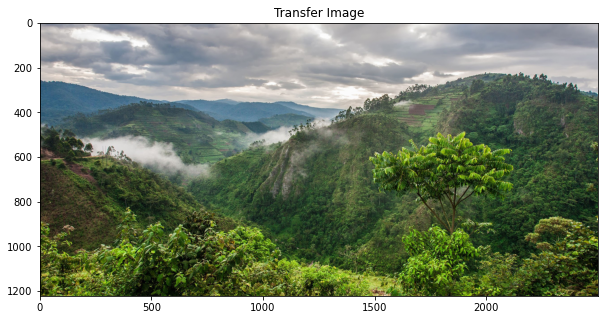

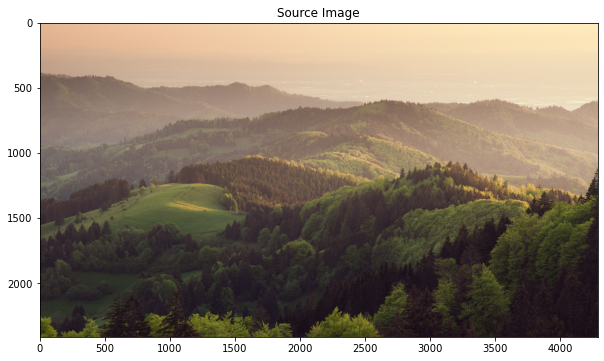

In [4]:
transfer_image = io.imread('transfer.jpg')
source_image = io.imread('source.jpg')

plt.figure(figsize = (10,10)), plt.title('Transfer Image'), plt.imshow(transfer_image)
plt.figure(figsize = (10,10)), plt.title('Source Image'), plt.imshow(source_image)

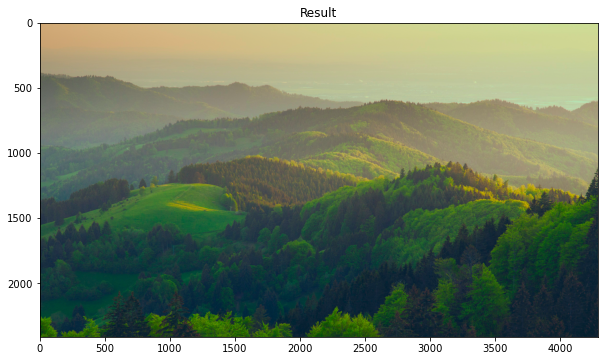

In [5]:
transfer = transfer_color(source_image, transfer_image)
plt.figure(figsize = (10,10)), plt.title("Result")
plt.imshow(transfer)